📘 Day 7 — CAPM Theory: Alpha, Beta & the Risk-Free Rate
This is one of the most important foundational concepts in finance, especially if you want to work in asset management, hedge funds, or even invest your own money intelligently.

🧠 What Is CAPM?
CAPM stands for Capital Asset Pricing Model.

It answers a fundamental question:

❓ How much return should I expect from an investment given the risk I am taking compared to the market?

💡 The CAPM Formula
Expected Return
=
𝑅
𝑓
+
𝛽
(
𝑅
𝑚
−
𝑅
𝑓
)
Expected Return=R
f
​
 +β(R
m
​
 −R
f
​
 )
Where:

Symbol	Meaning
𝑅
𝑓
R
f
​
 	Risk-Free Rate (like govt. bonds or T-bills)
𝑅
𝑚
R
m
​
 	Expected Return of the Market (e.g., NIFTY 50 returns)
𝛽
β	Beta – how volatile the stock is compared to the market
𝑅
𝑚
−
𝑅
𝑓
R
m
​
 −R
f
​
 	Market Risk Premium – extra return for taking market risk
Final Return	What the investor should expect to earn based on these inputs

🔍 Understanding Each Component
🟢 1. Risk-Free Rate
𝑅
𝑓
R
f
​

The return you get without taking any risk.

Example: Indian 10-year government bond yield (currently ~7%).

👉 We assume you can invest in this asset safely, so any investment must give more than this to be worth the risk.

🔵 2. Market Return
𝑅
𝑚
R
m
​

Average return of the overall market.

In India, use NIFTY 50 or Sensex returns as a proxy.

Long-term NIFTY returns are around 10–12% annually.

🔴 3. Beta
𝛽
β
This is the most important CAPM concept:

Beta measures the risk (volatility) of a stock relative to the market.

If market moves +1%, how much will the stock move?

Beta Value	Interpretation
1.0	Stock moves exactly like the market
> 1.0	Stock is more volatile (high risk, high return)
< 1.0	Stock is less volatile (stable)
< 0	Moves opposite to market (rare)

Example:
If RELIANCE has a beta of 1.2, and market goes up by 1%,
Reliance is expected to go up by 1.2%.

🟡 4. Alpha
𝛼
α
Alpha is the extra return a stock or portfolio earns beyond what CAPM predicted.

𝛼
=
Actual Return
−
Expected CAPM Return
α=Actual Return−Expected CAPM Return
Alpha Value	Interpretation
> 0	You outperformed market expectations
= 0	You got exactly what market expected
< 0	You underperformed given your risk level

Think of Alpha as your "skill bonus" in returns.

🎯 Intuition Behind CAPM
CAPM assumes investors are rational and care about risk vs return.

You deserve extra return only if you take more risk.

If a stock is risky but gives no extra return → not worth it!

So CAPM helps you decide if an asset is fairly priced based on its beta.

🧩 Summary Table
Concept	Role in CAPM	Real-World Source
Risk-Free Rate
𝑅
𝑓
R
f
​
 	Benchmark for no-risk return	Govt bonds (India 10Y yield)
Market Return
𝑅
𝑚
R
m
​
 	What you expect market to return	NIFTY 50 Index
Beta
𝛽
β	How volatile your stock is	Regression vs market
Alpha
𝛼
α	Your outperformance (skill)	Actual return − CAPM return

🧠 Example: Let’s Say
𝑅
𝑓
=
7
%
R
f
​
 =7% (Indian 10Y bond)

𝑅
𝑚
=
12
%
R
m
​
 =12% (Nifty expected return)

Stock’s Beta = 1.2

Then CAPM says:

Expected Return
=
7
+
1.2
×
(
12
−
7
)
=
13
%
Expected Return=7+1.2×(12−7)=13%
If your stock actually returned 15%, then:

𝛼
=
15
−
13
=
+
2
%
α=15−13=+2%
That means: You beat the market by 2%, after adjusting for risk.



In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
# Download stock data (INFY)
infy = yf.download("INFY.NS", start="2021-07-10", end="2025-07-10")['Close']

# Download NIFTY 50 index as market proxy
nifty = yf.download("^NSEI", start="2021-07-10", end="2025-07-10")['Close']

/tmp/ipython-input-3-3501498462.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  infy = yf.download("INFY.NS", start="2021-07-10", end="2025-07-10")['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3-3501498462.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nifty = yf.download("^NSEI", start="2021-07-10", end="2025-07-10")['Close']
[*********************100%***********************]  1 of 1 completed


In [ ]:
nifty.tail()

Ticker,^NSEI
Date,
2025-07-03,25405.300781
2025-07-04,25461.000000
2025-07-07,25461.300781
2025-07-08,25522.500000
2025-07-09,25476.099609


In [ ]:
# Calculate daily percentage returns
infy_returns = infy.pct_change().dropna()
nifty_returns = nifty.pct_change().dropna()

In [ ]:
# Combine both returns into one DataFrame
returns_df = pd.concat([infy_returns, nifty_returns], axis=1)
returns_df.columns = ['INFY', 'NIFTY']
returns_df.dropna(inplace=True)
returns_df.head()

,INFY,NIFTY
Date,,
2021-07-13,-0.001874,0.007631
2021-07-14,0.020680,0.002631
2021-07-15,0.002473,0.004431
2021-07-16,-0.016036,-0.000050
2021-07-19,-0.008840,-0.010739


Step 4: Run Linear Regression (CAPM)
INFY Return
=
𝛼
+
𝛽
×
NIFTY Return
+
𝜖
INFY Return=α+β×NIFTY Return+ϵ
python
Copy
Edit


Line-by-Line Explanation:
X = returns_df['NIFTY']: Market return is the independent variable

Y = returns_df['INFY']: INFY return is dependent (affected by market)

sm.add_constant(X): Adds a column of 1s so the model can learn the intercept (alpha)

sm.OLS(Y, X): Ordinary Least Squares regression

.fit(): Fits the model (calculates alpha & beta)

.summary(): Gives a detailed report (coefficients, R², p-values)



In [ ]:
# Define X (market returns) and Y (stock returns)
X = returns_df['NIFTY']
Y = returns_df['INFY']

# Add constant term for alpha
X = sm.add_constant(X)

In [ ]:
X

,const,NIFTY
Date,,
2021-07-13,1.0,0.007631
2021-07-14,1.0,0.002631
2021-07-15,1.0,0.004431
2021-07-16,1.0,-0.000050
2021-07-19,1.0,-0.010739
...,...,...
2025-07-03,1.0,-0.001890
2025-07-04,1.0,0.002192
2025-07-07,1.0,0.000012


In [ ]:
# Run regression
model = sm.OLS(Y, X).fit()

In [ ]:
# Show results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   INFY   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     483.2
Date:                Thu, 10 Jul 2025   Prob (F-statistic):           1.95e-87
Time:                        10:05:22   Log-Likelihood:                 2907.3
No. Observations:                 986   AIC:                            -5811.
Df Residuals:                     984   BIC:                            -5801.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.000     -0.645      0.5

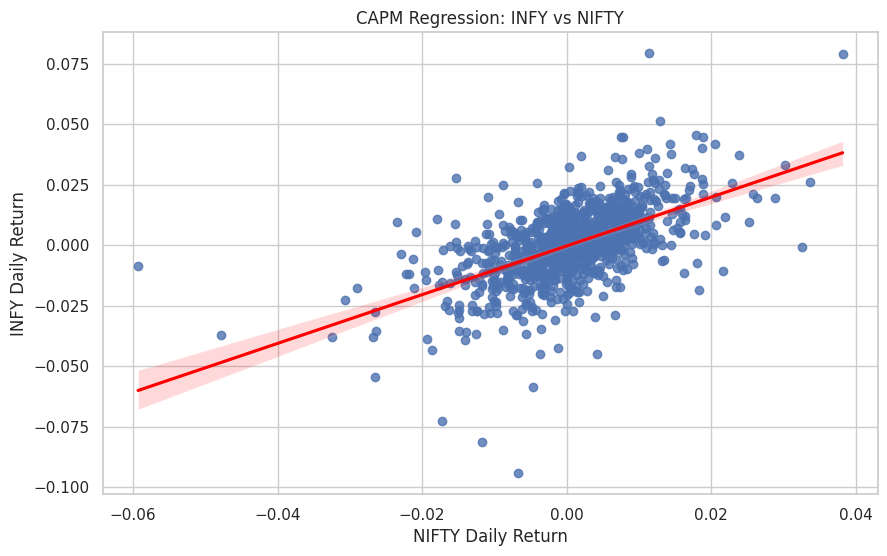

In [ ]:
# Scatter plot + regression line
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.regplot(x='NIFTY', y='INFY', data=returns_df, line_kws={'color': 'red'})
plt.title("CAPM Regression: INFY vs NIFTY")
plt.xlabel("NIFTY Daily Return")
plt.ylabel("INFY Daily Return")
plt.show()

Making a function to avoid writing code everytime for individual stock

In [ ]:
def run_capm_regression(stock_symbol, market_symbol="^NSEI", start="2021-07-10", end="2025-07-10"):
    # Fetch data
    stock = yf.download(stock_symbol, start=start, end=end)['Close']
    market = yf.download(market_symbol, start=start, end=end)['Close']

    # Calculate returns
    stock_ret = stock.pct_change().dropna()
    market_ret = market.pct_change().dropna()

    # Align dates
    data = pd.concat([stock_ret, market_ret], axis=1).dropna()
    data.columns = ['Stock', 'Market']

    # Regression
    X = sm.add_constant(data['Market'])
    y = data['Stock']
    model = sm.OLS(y, X).fit()

    # Extract metrics
    alpha = model.params['const']
    beta = model.params['Market']
    r2 = model.rsquared
    p_alpha = model.pvalues['const']
    p_beta = model.pvalues['Market']

    print(f"CAPM for {stock_symbol}")
    print(model.summary())
    print("="*80)

    return {
        'Stock': stock_symbol,
        'Alpha': alpha,
        'Beta': beta,
        'R_squared': r2,
        'Alpha_pval': p_alpha,
        'Beta_pval': p_beta
    }

In [ ]:
# Run CAPM regression for each
tcs_results = run_capm_regression("TCS.NS")
rel_results = run_capm_regression("RELIANCE.NS")
infy_results = run_capm_regression("INFY.NS")

/tmp/ipython-input-14-1275405307.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(stock_symbol, start=start, end=end)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-14-1275405307.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  market = yf.download(market_symbol, start=start, end=end)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-14-1275405307.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(stock_symbol, start=start, end=end)['Close']


CAPM for TCS.NS
                            OLS Regression Results                            
Dep. Variable:                  Stock   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     408.9
Date:                Thu, 10 Jul 2025   Prob (F-statistic):           2.65e-76
Time:                        10:25:01   Log-Likelihood:                 3043.5
No. Observations:                 986   AIC:                            -6083.
Df Residuals:                     984   BIC:                            -6073.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.000    

[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-14-1275405307.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  market = yf.download(market_symbol, start=start, end=end)['Close']
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

CAPM for RELIANCE.NS
                            OLS Regression Results                            
Dep. Variable:                  Stock   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     990.6
Date:                Thu, 10 Jul 2025   Prob (F-statistic):          5.35e-151
Time:                        10:25:02   Log-Likelihood:                 3126.8
No. Observations:                 986   AIC:                            -6250.
Df Residuals:                     984   BIC:                            -6240.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.519e-05      0.00


/tmp/ipython-input-14-1275405307.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  market = yf.download(market_symbol, start=start, end=end)['Close']
[*********************100%***********************]  1 of 1 completed

CAPM for INFY.NS
                            OLS Regression Results                            
Dep. Variable:                  Stock   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     483.2
Date:                Thu, 10 Jul 2025   Prob (F-statistic):           1.95e-87
Time:                        10:25:02   Log-Likelihood:                 2907.3
No. Observations:                 986   AIC:                            -5811.
Df Residuals:                     984   BIC:                            -5801.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.000   

In [ ]:
# Combine all into a DataFrame
capm_df = pd.DataFrame([infy_results, tcs_results, rel_results])
capm_df.set_index('Stock', inplace=True)
capm_df

,Alpha,Beta,R_squared,Alpha_pval,Beta_pval
Stock,,,,,
INFY.NS,-0.000261,1.007850,0.329325,0.519093,1.948267e-87
TCS.NS,-0.000219,0.807469,0.293537,0.534538,2.645714e-76
RELIANCE.NS,-0.000035,1.155018,0.501682,0.913589,5.345015e-151


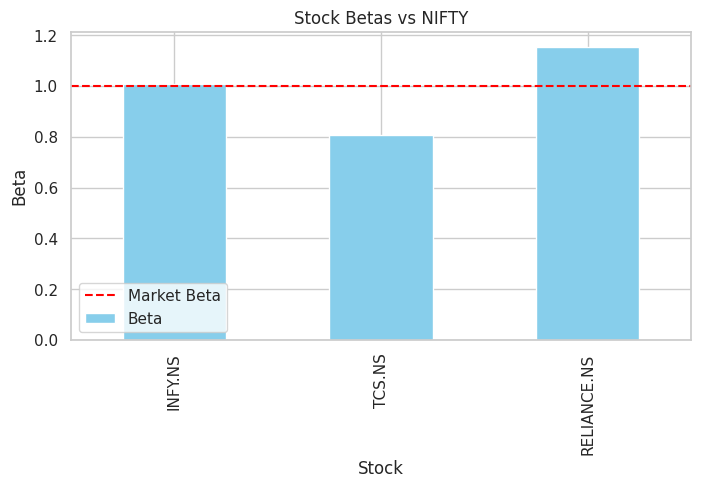

In [ ]:
capm_df['Beta'].plot(kind='bar', figsize=(8,4), title="Stock Betas vs NIFTY", color='skyblue')
plt.ylabel("Beta")
plt.axhline(1, color='red', linestyle='--', label='Market Beta')
plt.legend()
plt.show()

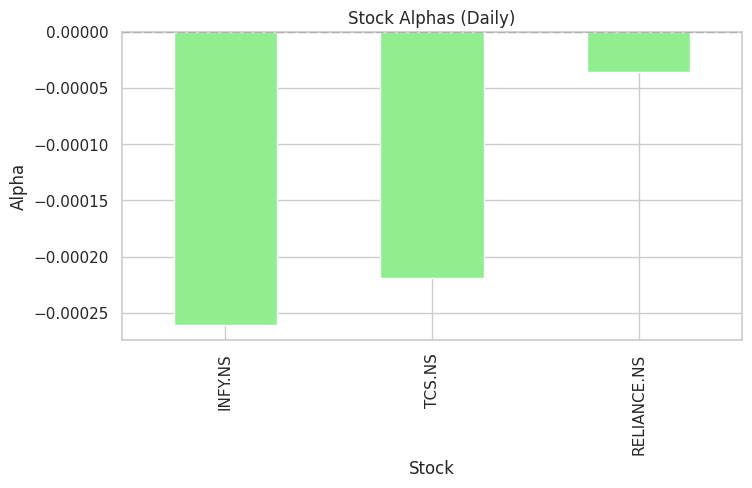

In [ ]:
capm_df['Alpha'].plot(kind='bar', figsize=(8,4), title="Stock Alphas (Daily)", color='lightgreen')
plt.ylabel("Alpha")
plt.axhline(0, color='black', linestyle='--')
plt.show()